<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/PyCaret_Classification_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [4]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
   ━━━

In [5]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [6]:
from pycaret.utils import version
version()

'3.3.2'

# 1. Importing Dataset

In [10]:
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# 2. Setting up Environment

In [5]:
setup??

In [11]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=786)

,Description,Value
0,Session id,786
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Numeric features,17
9,Categorical features,1


# 3. Compare Models

In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8211,0.9004,0.8211,0.8220,0.8201,0.6214,0.6237,0.0680
lda,Linear Discriminant Analysis,0.8211,0.9014,0.8211,0.8215,0.8202,0.6211,0.6229,0.0670
lr,Logistic Regression,0.8184,0.9004,0.8184,0.8184,0.8169,0.6137,0.6161,0.7830
gbc,Gradient Boosting Classifier,0.8104,0.9014,0.8104,0.8135,0.8096,0.6005,0.6042,0.2340
lightgbm,Light Gradient Boosting Machine,0.8011,0.8809,0.8011,0.8044,0.8006,0.5819,0.5853,1.2390
ada,Ada Boost Classifier,0.7957,0.8792,0.7957,0.7977,0.7937,0.5656,0.5702,0.1720
xgboost,Extreme Gradient Boosting,0.7957,0.8723,0.7957,0.7980,0.7953,0.5707,0.5730,0.3250
et,Extra Trees Classifier,0.7944,0.8640,0.7944,0.7998,0.7933,0.5667,0.5729,0.2660
rf,Random Forest Classifier,0.7904,0.8885,0.7904,0.7932,0.7900,0.5601,0.5628,0.5050
dt,Decision Tree Classifier,0.7664,0.7563,0.7664,0.7714,0.7657,0.5102,0.5148,0.0700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=786, solver='auto',
                tol=0.0001)

# 4. Create Model

In [13]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.8936,0.7867,0.7862,0.7809,0.5323,0.5407
1,0.7733,0.8621,0.7733,0.7707,0.7707,0.5128,0.5147
2,0.8533,0.9288,0.8533,0.8529,0.8516,0.6848,0.6873
3,0.9200,0.9753,0.9200,0.9200,0.9200,0.8313,0.8313
4,0.8400,0.9123,0.8400,0.8430,0.8409,0.6669,0.6679
5,0.7867,0.8756,0.7867,0.7902,0.7879,0.5559,0.5567
6,0.8267,0.8996,0.8267,0.8258,0.8261,0.6322,0.6325
7,0.7467,0.8548,0.7467,0.7440,0.7441,0.4633,0.4649
8,0.8267,0.9244,0.8267,0.8280,0.8233,0.6286,0.6351


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.7751,0.7867,0.7867,0.7867,0.5502,0.5502
1,0.8133,0.8032,0.8133,0.8133,0.8133,0.6064,0.6064
2,0.7733,0.7324,0.7733,0.7777,0.7626,0.4930,0.5118
3,0.7867,0.7942,0.7867,0.8018,0.7892,0.5668,0.5744
4,0.7867,0.8006,0.7867,0.8100,0.7894,0.5720,0.5856
5,0.7200,0.7144,0.7200,0.7266,0.7222,0.4207,0.4222
6,0.7467,0.7425,0.7467,0.7530,0.7486,0.4759,0.4775
7,0.6933,0.6722,0.6933,0.6894,0.6902,0.3503,0.3515
8,0.7733,0.7556,0.7733,0.7713,0.7710,0.5198,0.5217


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# 5. Tune Model

In [17]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.8688,0.8400,0.8390,0.8388,0.6583,0.6594
1,0.8267,0.8651,0.8267,0.8258,0.8261,0.6322,0.6325
2,0.8800,0.9588,0.8800,0.8795,0.8796,0.7454,0.7457
3,0.8667,0.9610,0.8667,0.8742,0.8679,0.7259,0.7303
4,0.8000,0.8688,0.8000,0.8057,0.8015,0.5862,0.5883
5,0.8000,0.8733,0.8000,0.8115,0.8022,0.5914,0.5969
6,0.7733,0.8729,0.7733,0.7721,0.7726,0.5190,0.5193
7,0.7733,0.8370,0.7733,0.7788,0.7748,0.5355,0.5373
8,0.8000,0.8585,0.8000,0.8035,0.7940,0.5665,0.5784


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
# Create the Naive Bayes model first
nb = create_model('nb')

# Then, tune the created model
tuned_nb = tune_model(nb, optimize='AUC')

#tuned_nb = tune_model('nb', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.8546,0.7600,0.7689,0.7623,0.5066,0.5097
1,0.7467,0.7811,0.7467,0.7530,0.7486,0.4759,0.4775
2,0.8267,0.8726,0.8267,0.8258,0.8261,0.6322,0.6325
3,0.8133,0.9055,0.8133,0.8166,0.8144,0.6114,0.6123
4,0.6933,0.8321,0.6933,0.7212,0.6973,0.3885,0.4001
5,0.6933,0.7961,0.6933,0.7131,0.6972,0.3811,0.3880
6,0.7467,0.8403,0.7467,0.7484,0.7474,0.4693,0.4695
7,0.7067,0.7741,0.7067,0.7371,0.7093,0.4211,0.4364
8,0.7867,0.8704,0.7867,0.7851,0.7853,0.5506,0.5514


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8533,0.8763,0.8533,0.8529,0.8516,0.6848,0.6873
1,0.7467,0.7699,0.7467,0.7452,0.7458,0.4625,0.4627
2,0.8400,0.8996,0.8400,0.8400,0.8374,0.6538,0.6582
3,0.8267,0.8921,0.8267,0.8255,0.8247,0.6274,0.6298
4,0.7867,0.8583,0.7867,0.7952,0.7887,0.5614,0.5648
5,0.7467,0.8081,0.7467,0.7530,0.7486,0.4759,0.4775
6,0.7333,0.8396,0.7333,0.7333,0.7333,0.4378,0.4378
7,0.7333,0.8089,0.7333,0.7369,0.7346,0.4505,0.4512
8,0.7733,0.8600,0.7733,0.7713,0.7710,0.5198,0.5217


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
print(tuned_nb)

GaussianNB(priors=None, var_smoothing=3e-07)


# 6. Ensemble Model

In [22]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8501,0.8000,0.7992,0.7957,0.5645,0.5705
1,0.7600,0.8617,0.7600,0.7577,0.7583,0.4875,0.4883
2,0.8267,0.9397,0.8267,0.8273,0.8230,0.6225,0.6292
3,0.9067,0.9539,0.9067,0.9168,0.9077,0.8093,0.8169
4,0.8133,0.8827,0.8133,0.8215,0.8151,0.6162,0.6200
5,0.7733,0.8628,0.7733,0.7707,0.7707,0.5128,0.5147
6,0.7067,0.8073,0.7067,0.7109,0.7083,0.3893,0.3899
7,0.7067,0.8244,0.7067,0.7029,0.6961,0.3605,0.3706
8,0.8000,0.9019,0.8000,0.8000,0.7962,0.5714,0.5774


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [23]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7467,0.7425,0.7467,0.7530,0.7486,0.4759,0.4775
1,0.8133,0.8032,0.8133,0.8133,0.8133,0.6064,0.6064
2,0.7867,0.7496,0.7867,0.7901,0.7781,0.5261,0.5415
3,0.8000,0.8051,0.8000,0.8115,0.8022,0.5914,0.5969
4,0.8000,0.8051,0.8000,0.8115,0.8022,0.5914,0.5969
5,0.7067,0.7035,0.7067,0.7162,0.7095,0.3969,0.3993
6,0.7733,0.7770,0.7733,0.7851,0.7758,0.5369,0.5419
7,0.6533,0.6333,0.6533,0.6498,0.6511,0.2697,0.2701
8,0.7333,0.7222,0.7333,0.7333,0.7333,0.4444,0.4444


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 7. Blend Models

In [24]:
lr = create_model('lr', verbose=False)
lda = create_model('lda', verbose=False)
gbc = create_model('gbc', verbose=False)

In [25]:
blender = blend_models(estimator_list=[lr,lda,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.9070,0.7867,0.7845,0.7832,0.5385,0.5421
1,0.8133,0.8808,0.8133,0.8133,0.8133,0.6064,0.6064
2,0.8400,0.9370,0.8400,0.8400,0.8374,0.6538,0.6582
3,0.9333,0.9850,0.9333,0.9341,0.9335,0.8603,0.8607
4,0.8133,0.9085,0.8133,0.8166,0.8144,0.6114,0.6123
5,0.8133,0.8838,0.8133,0.8166,0.8144,0.6114,0.6123
6,0.8000,0.8958,0.8000,0.8015,0.8006,0.5810,0.5812
7,0.7467,0.8496,0.7467,0.7440,0.7441,0.4633,0.4649
8,0.8533,0.9415,0.8533,0.8532,0.8518,0.6893,0.6918


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [26]:
blender.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
          

# 8. Analyze Model

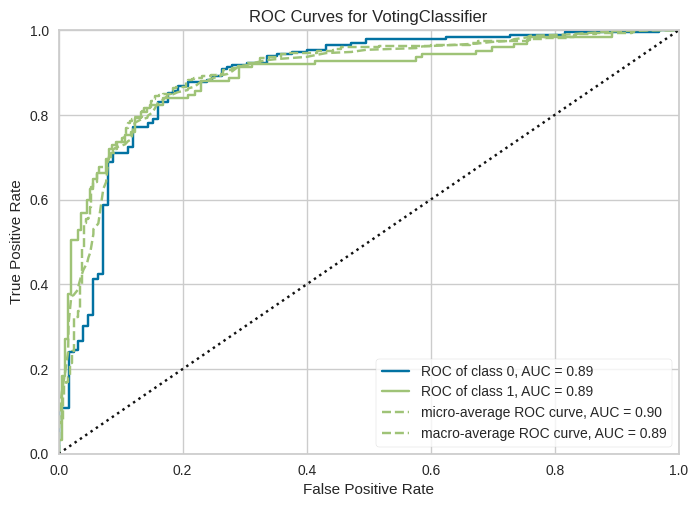

In [27]:
plot_model(blender)

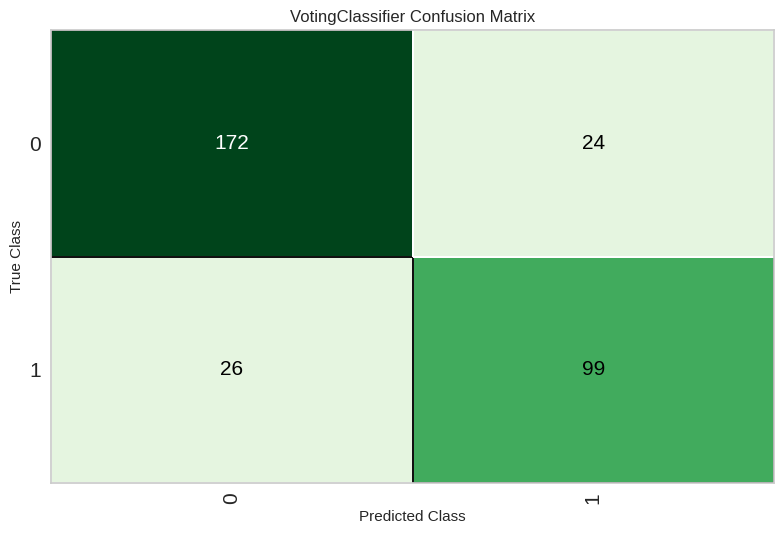

In [28]:
plot_model(blender, plot = 'confusion_matrix')

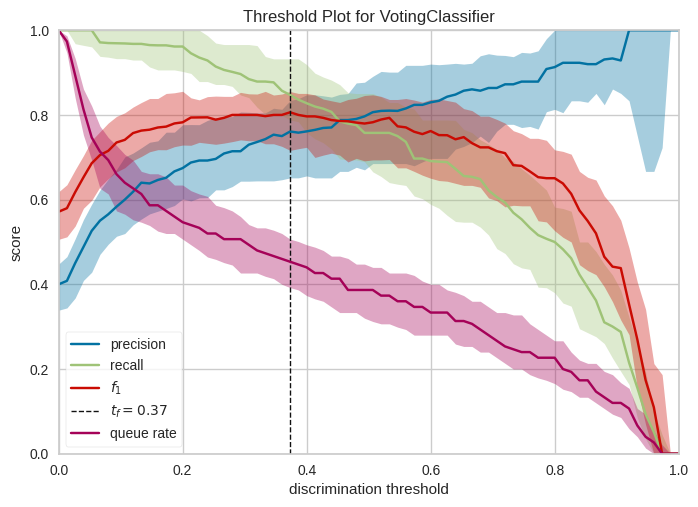

In [29]:
plot_model(blender, plot = 'threshold')

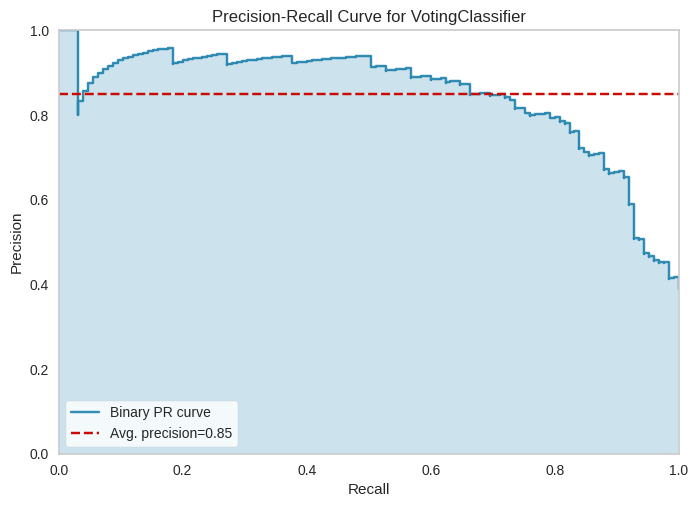

In [31]:
plot_model(blender, plot = 'pr')

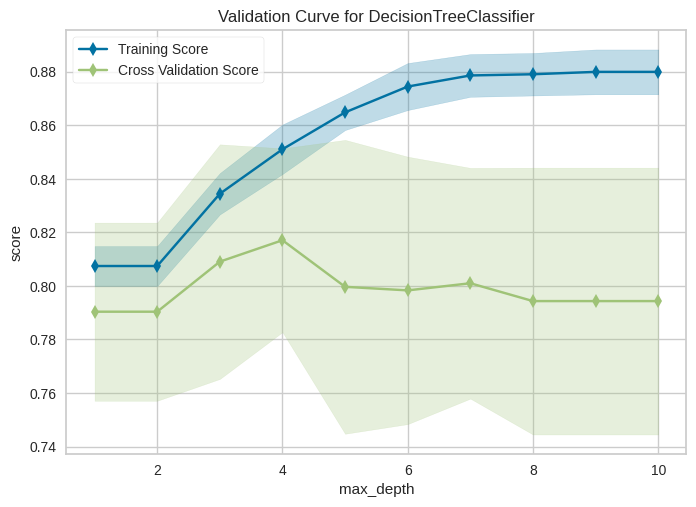

In [32]:
plot_model(tuned_dt, plot = 'vc')

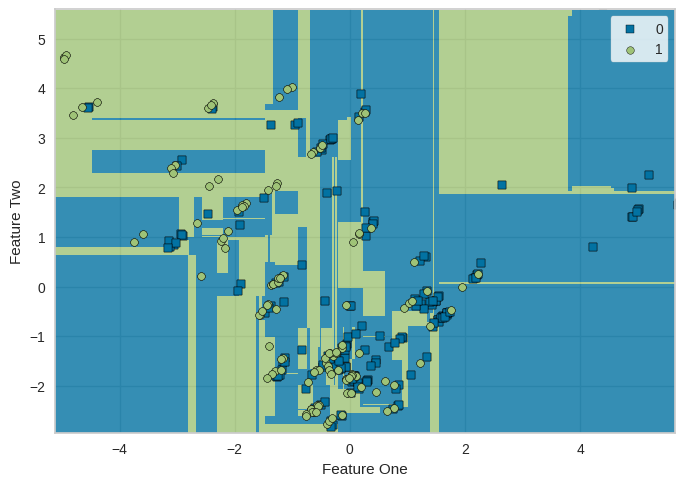

In [33]:
plot_model(dt, plot = 'boundary')

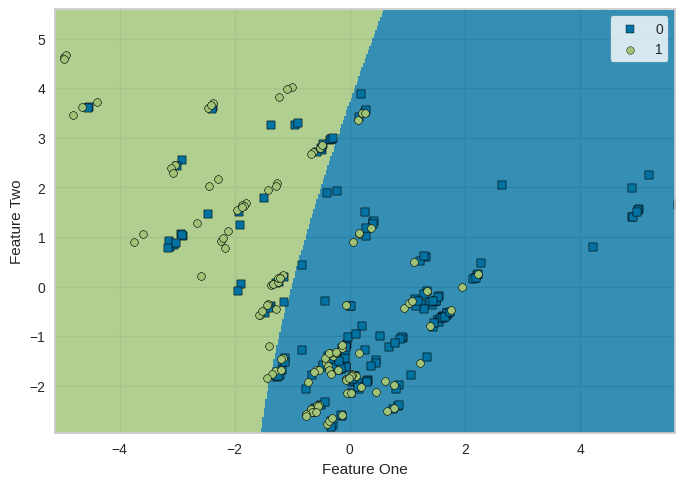

In [34]:
plot_model(tuned_nb, plot = 'boundary')

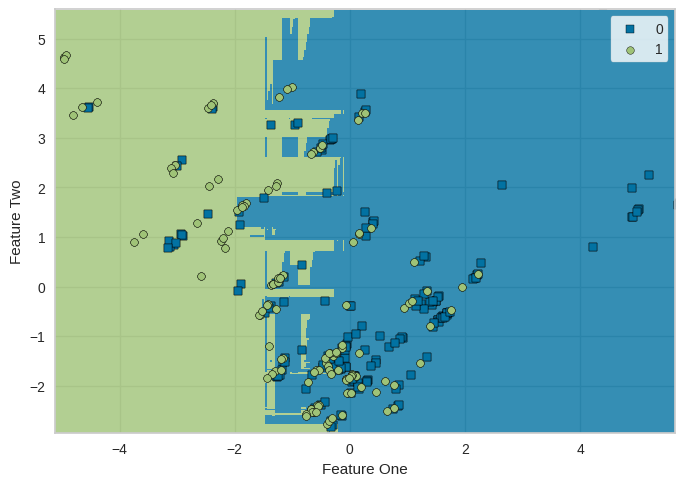

In [35]:
plot_model(blender, plot = 'boundary')

In [36]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 9. Interpret Model

In [37]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.8741,0.7867,0.7845,0.7832,0.5385,0.5421
1,0.7867,0.8928,0.7867,0.7867,0.7867,0.5502,0.5502
2,0.8133,0.9108,0.8133,0.8123,0.8103,0.5962,0.6002
3,0.8667,0.9430,0.8667,0.8742,0.8679,0.7259,0.7303
4,0.8000,0.8396,0.8000,0.8015,0.8006,0.5810,0.5812
5,0.8000,0.8268,0.8000,0.8057,0.8015,0.5862,0.5883
6,0.7467,0.8058,0.7467,0.7588,0.7494,0.4824,0.4869
7,0.7333,0.8444,0.7333,0.7300,0.7295,0.4318,0.4346
8,0.8133,0.9333,0.8133,0.8122,0.8121,0.6067,0.6077


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

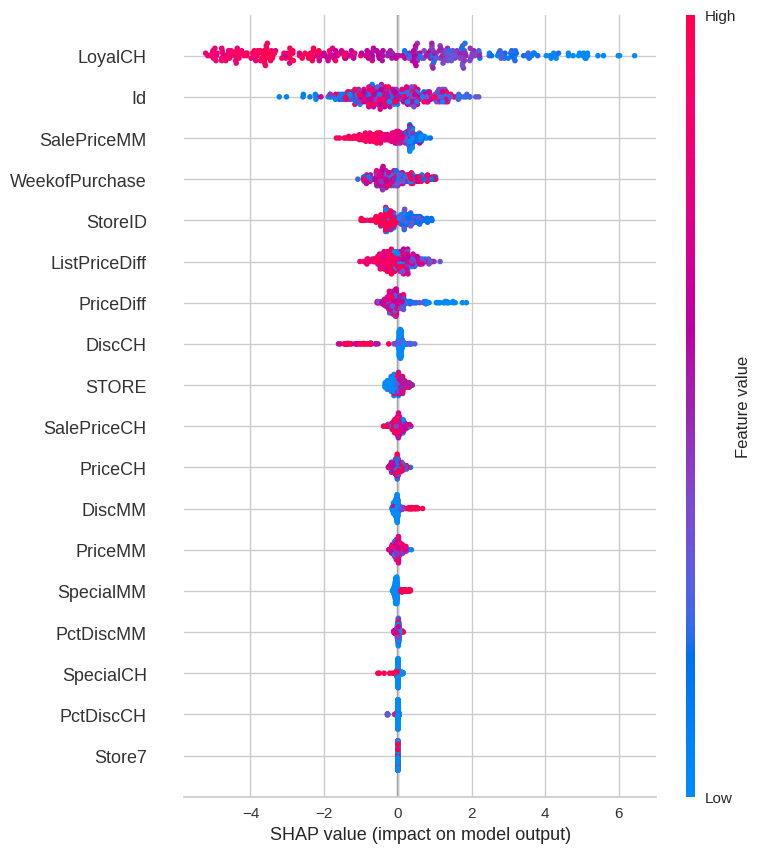

In [38]:
interpret_model(xgboost)

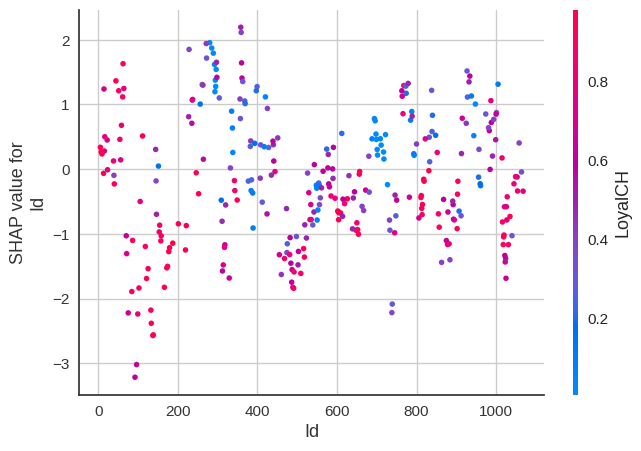

In [39]:
interpret_model(xgboost, plot = 'correlation')

In [40]:
interpret_model(xgboost, plot = 'reason', observation=1)

In [41]:
interpret_model(xgboost, plot = 'reason')

# Learning Resources:

- PyCaret Classification Module : https://www.pycaret.org/classification
- Binary Classification Tutorial (Level Beginner) : https://pycaret.org/clf101/
- Binary Classification Tutorial (Level Intermediate) : https://pycaret.org/clf102/
- Kaggle Titanic Predictions (Video Tutorial) : https://www.youtube.com/watch?v=nqMM6rngNCA